In [3]:
import torch

In [6]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [18]:
nli_model = AutoModelForSequenceClassification.from_pretrained('./bart-large-mnli')
tokenizer = AutoTokenizer.from_pretrained('./bart-large-mnli')

In [8]:
classifier = pipeline("zero-shot-classification", model="./app/bart-large-mnli")

In [15]:
sequence_to_classify = "i do programming to develop a system"
candidate_labels = ['danger', 'office']

In [16]:
result = classifier(sequence_to_classify, candidate_labels)

In [17]:
result['scores'][0]

0.6439144015312195

In [18]:
result

{'sequence': 'i do programming to develop a system',
 'labels': ['office', 'danger'],
 'scores': [0.6439144015312195, 0.35608556866645813]}

In [20]:
result['labels'].index('danger')

1

In [1]:
from PIL import Image
import requests

In [2]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("./app/clip-vit-large-patch14-local")
processor = CLIPProcessor.from_pretrained("./app/clip-vit-large-patch14-local")

In [22]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(r"C:\Users\nurha\Downloads\photo_2022-09-06_17-42-40.jpg")
inputs = processor(text=['healthy', 'fat face'], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) 

In [23]:
probs

tensor([[0.1841, 0.8159]], grad_fn=<SoftmaxBackward0>)

In [24]:
import requests
from bs4 import BeautifulSoup

In [50]:
url = r'https://www.google.com/search?q=factory_technician+job+description'
page = requests.get(url)

In [29]:
page

<Response [200]>

In [51]:
soup = BeautifulSoup(page.text, 'html.parser')

In [33]:
# soup.find(hgKElc)
soup.select_one('.hgKElc')

In [34]:
soup.find(class_='hgKElc')

<!DOCTYPE html>
<html lang="en-MY"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>engineer job description - Google Search</title><script nonce="5fBV61eeBULQL8bFismWXQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google
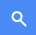
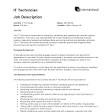
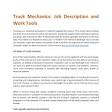

In [41]:
soup

In [52]:
soup.select('.BNeawe')[0].text

'Manufacturing Technicians run and maintain factory equipment and assembly processes, monitor and check the product quality and document results in strict adherence to protocols in a discrete manufacturing environment.'

In [39]:
soup.findAll('span')

[<span class="V6gwVd">G</span>,
 <span class="iWkuvd">o</span>,
 <span class="cDrQ7">o</span>,
 <span class="V6gwVd">g</span>,
 <span class="ntlR9">l</span>,
 <span class="iWkuvd tJ3Myc">e</span>,
 <span class="OXXup">All</span>,
 <span class="OmTIzf"></span>,
 <span class="OmTIzf"></span>,
 <span class="FCUp0c rQMQod">uses math and science to solve different technical problems</span>,
 <span><div class="BNeawe vvjwJb AP7Wnd"><span class="rQMQod Xb5VRe">Engineer Job Description [Updated for 2023] - Indeed</span></div></span>,
 <span class="rQMQod Xb5VRe">Engineer Job Description [Updated for 2023] - Indeed</span>,
 <span><div class="BNeawe UPmit AP7Wnd">www.indeed.com › Home › How to Write a Job Description › Engineer</div></span>,
 <span><div class="BNeawe uEec3 AP7Wnd"><span class="BNeawe"><a href="https://www.google.com/url?q=https://support.google.com/websearch%3Fp%3Dfeatured_snippets%26hl%3Den-MY&amp;usg=AOvVaw1WlBuKJ2d20tXLsaNfRN6o"><span class="uEec3 AP7Wnd"><span class="r0bn4c 